In [5]:
import pandas as pd
import numpy as np

In [104]:
word = pd.read_csv('subsample_with_embeddings.csv', index_col=0)

In [105]:
image = np.load('embeddings.npy')

In [106]:
word['image_embedding'] = list(image) + [None]

In [107]:
word = word[['2_way_label', 'embedding', 'image_embedding']]
word.at[807, 'image_embedding'] = np.array([0] * 768)
word

,2_way_label,embedding,image_embedding
1501,1,[ 2.11669922e-01 1.37481689e-01 -5.89828491e-...,"[-0.4427494, -0.38913497, -0.71913767, 0.33591..."
810,1,[ 9.24804658e-02 1.87927242e-02 -6.30126968e-...,"[-0.028913252, 0.05836347, -0.6802907, -0.3996..."
1263,0,[ 8.69547501e-02 8.66292343e-02 3.39762378e-...,"[0.23632702, -0.3136532, -0.7833014, 0.4323341..."
1269,1,[ 0.07114955 0.1547154 0.06651524 0.080618...,"[0.21592115, -0.4950292, -0.6588461, 0.2772676..."
804,0,[ 7.51953125e-02 5.92447929e-02 -5.05371094e-...,"[0.36428666, -0.53656423, -0.35537028, 0.38312..."
...,...,...,...
1254,1,[-7.42594386e-03 -3.45052071e-02 -3.42203788e-...,"[0.40538737, -0.7155178, -0.29736775, 0.333112..."
1240,1,[ 0.02744547 0.0343221 0.01269531 0.097877...,"[0.2249332, -0.22547236, 0.028913751, -0.09195..."
1526,1,[-9.03320312e-03 -1.26215620e-02 5.04557276e-...,"[-0.23899114, -0.3241832, -0.24674445, -0.2790..."
1268,1,[-3.53190117e-02 4.36740443e-02 1.17594404e-...,"[0.39130887, -0.001183852, -0.33241507, 0.1053..."


In [108]:
import re
def list_to_vec(s):
  result = re.sub(r'[\[\]]', '', s).strip().split()
  return [float(i) for i in result]

In [109]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have a dataframe `word` with columns `2_way_label`, `embedding`, and `image_embedding`.
# Convert columns to numpy arrays
labels = np.array(word['2_way_label'])
embedding = np.stack(word['embedding'])
image_embedding = np.stack(word['image_embedding'])

embedding = np.array([list_to_vec(i) for i in embedding])

# Preprocess the data (normalize embeddings)
scaler = StandardScaler()
embedding = scaler.fit_transform(embedding)
image_embedding = scaler.fit_transform(image_embedding)

# Split the data into train and test sets
X_train_embed, X_test_embed, X_train_img, X_test_img, y_train, y_test = train_test_split(
    embedding, image_embedding, labels, test_size=0.33, random_state=42
)

# Define the model
input_embed = Input(shape=(embedding.shape[1],), name="Text_Embedding_Input")
input_image_embed = Input(shape=(image_embedding.shape[1],), name="Image_Embedding_Input")

# Combine embeddings
merged = Concatenate()([input_embed, input_image_embed])

# Add hidden layers
hidden = Dense(64, activation="relu")(merged)
hidden = Dense(32, activation="relu")(hidden)

# Output layer
output = Dense(1, activation="sigmoid", name="Output")(hidden)

# Create the model
model = Model(inputs=[input_embed, input_image_embed], outputs=output)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(
    [X_train_embed, X_train_img], y_train,
    validation_data=([X_test_embed, X_test_img], y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5687 - loss: 0.7371 - val_accuracy: 0.6543 - val_loss: 0.6492
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9115 - loss: 0.3176 - val_accuracy: 0.6478 - val_loss: 0.6526
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9685 - loss: 0.2019 - val_accuracy: 0.6522 - val_loss: 0.6975
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0982 - val_accuracy: 0.6435 - val_loss: 0.7396
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9949 - loss: 0.0600 - val_accuracy: 0.6435 - val_loss: 0.7971
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0294 - val_accuracy: 0.6391 - val_loss: 0.8598
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0184 - val_accuracy: 0.6413 - val_loss: 0.9249
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accuracy: 0.6435 - val_los

In [112]:
pred = model.predict([X_test_embed, X_test_img])

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


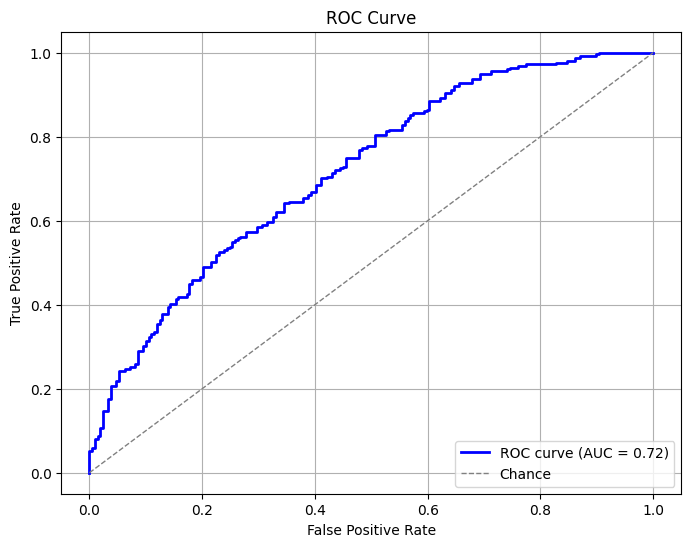

In [116]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data = {
    'TrueLabel': y_test,
    'Scores': pred[:, 0]
}
df = pd.DataFrame(data)

fpr, tpr, thresholds = roc_curve(df['TrueLabel'], df['Scores'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Chance')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()